In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
ins_data = pd.read_csv('insurance.csv')
ins_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
ins_data.shape

(1338, 7)

In [7]:
ins_data.drop_duplicates(inplace=True)

In [8]:
ins_data.shape
# We can find only one duplicate row.

(1337, 7)

In [9]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [11]:
ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

### Altranate way of finding Null values 

<AxesSubplot:>

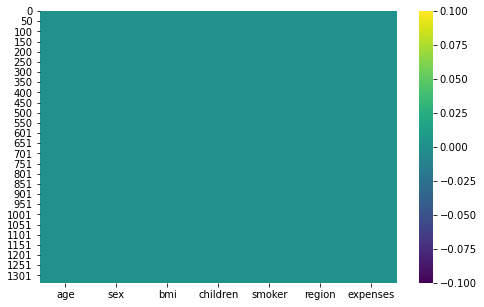

In [23]:
plt.subplots(figsize = (8, 5))
sns.heatmap(ins_data.isnull(), cmap = 'viridis')

In [3]:
ins_data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


### How we can extract the required data from df.describe

In [67]:
ins_data.describe().loc['std']
# in .loc the frist argument always it should be row then col

age            14.044333
bmi             6.100664
children        1.205571
expenses    12110.359657
Name: std, dtype: float64

In [46]:
ins_data.describe().loc['std']['age']

14.044332734156422

##### A standard deviation is a statistic that measures the dispersion of a dataset relative to its mean. 


In [50]:
ins_data['region'].mode()

0    southeast
dtype: object

In [53]:
ins_data['age'].mean()

39.222139117427076

In [54]:
ins_data['age'].median()

39.0

### Detecting the outliers
1. Sorting method
2. IQR method
3. Z-score method
4. Boxplot

In [55]:
ins_data.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


<AxesSubplot:>

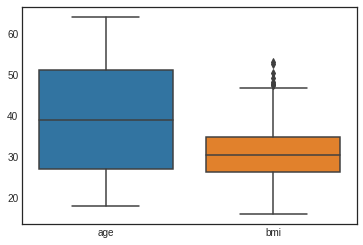

In [107]:

sns.boxplot(data = ins_data.loc[:, ['age', 'bmi']])

<AxesSubplot:>

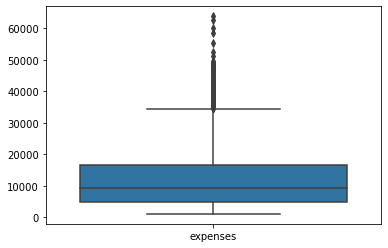

In [68]:
sns.boxplot(data = ins_data.loc[:, ['expenses']])

<AxesSubplot:>

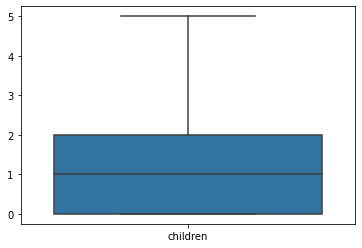

In [72]:
sns.boxplot(data = ins_data.loc[:, ['children']])

In [75]:
ins_data['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [78]:
ins_data['children'].count()

1337

/home/shiva/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

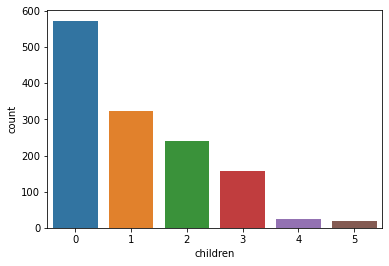

In [79]:
sns.countplot(ins_data['children'])

#### Below trying to extract peoples with more 5 childrens. 

In [86]:
ins_data[ins_data['children'] == 5]

,age,sex,bmi,children,smoker,region,expenses
32,19,female,28.6,5,no,southwest,4687.80
71,31,male,28.5,5,no,northeast,6799.46
166,20,female,37.0,5,no,southwest,4830.63
413,25,male,23.9,5,no,southwest,5080.10
425,45,male,24.3,5,no,southeast,9788.87
438,52,female,46.8,5,no,southeast,12592.53
568,49,female,31.9,5,no,southwest,11552.90
640,33,male,42.4,5,no,southwest,6666.24
877,33,male,33.4,5,no,southeast,6653.79
932,46,male,25.8,5,no,southwest,10096.97


In [5]:
Num_data = ins_data.loc[:, ['age', 'bmi', 'expenses']]
Num_data

,age,bmi,expenses
0,19,27.9,16884.92
1,18,33.8,1725.55
2,28,33.0,4449.46
3,33,22.7,21984.47
4,32,28.9,3866.86
...,...,...,...
1333,50,31.0,10600.55
1334,18,31.9,2205.98
1335,18,36.9,1629.83
1336,21,25.8,2007.95


## Data Distribution

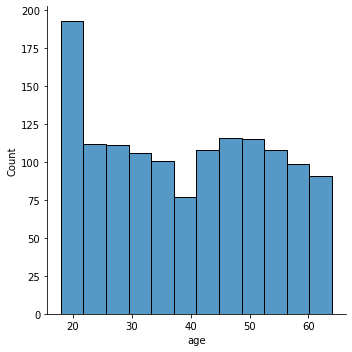

In [91]:
sns.displot(Num_data['age'])

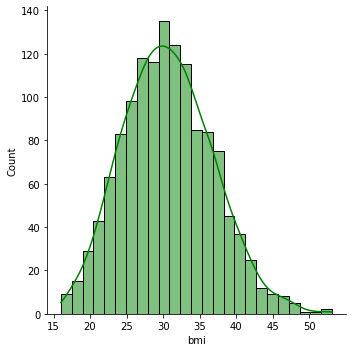

In [94]:
sns.displot(Num_data['bmi'], kde =  True, color = 'green')
# The BMI data distribution looks like normaly distributed.

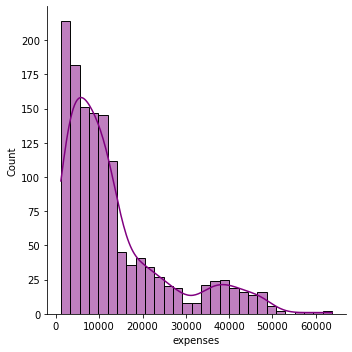

In [97]:
sns.displot(Num_data['expenses'], kde =  True, color = 'purple')

## All distribution ploting at one place

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'expenses'}>, <AxesSubplot:>]],
      dtype=object)

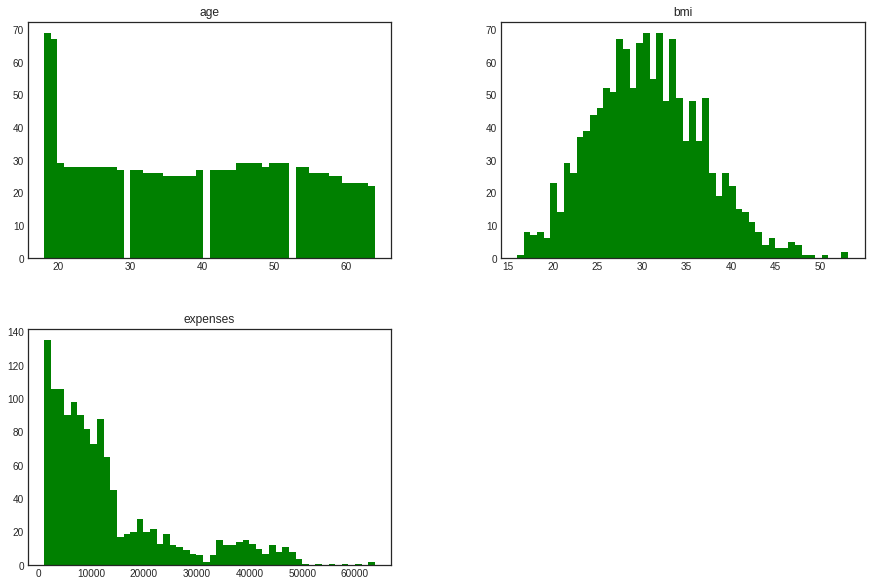

In [105]:
plt.style.use('seaborn-white')
Num_data.hist(bins = 50, figsize =(15,10), grid = False, color='green')

## Outlier detection using z score method

In [6]:
z = np.abs(st.zscore(Num_data))
print(z)

[[1.43876426 0.4536457  0.29858346]
 [1.50996545 0.51418574 0.95368938]
 [0.79795355 0.38295436 0.72867485]
 ...
 [1.50996545 1.02270734 0.96159654]
 [1.29636188 0.79812808 0.93036111]
 [1.55168573 0.25679863 1.31105343]]


In [7]:
threshold = 3
np.where(z>3)

(array([  34,  116,  543,  577,  819,  847, 1047, 1146, 1230, 1300, 1317]),
 array([2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1]))

In [122]:
Num_data.shape

(1337, 3)

In [8]:
Num_data_without_outlier = Num_data[(z<3).all(axis=1)]

In [125]:
Num_data_without_outlier.shape

(1326, 3)

In [9]:
Num_data_without_outlier.head()

,age,bmi,expenses
0,19,27.9,16884.92
1,18,33.8,1725.55
2,28,33.0,4449.46
3,33,22.7,21984.47
4,32,28.9,3866.86


## Outlier detection using IQR method 
1. IQR = Q3-Q2
2. Q1 -(1.5 X IQR)
3. Q3 + (1.5 X IQR) 

In [15]:
Num_data

,age,bmi,expenses
0,19,27.9,16884.92
1,18,33.8,1725.55
2,28,33.0,4449.46
3,33,22.7,21984.47
4,32,28.9,3866.86
...,...,...,...
1333,50,31.0,10600.55
1334,18,31.9,2205.98
1335,18,36.9,1629.83
1336,21,25.8,2007.95


In [20]:
Q2 = Num_data.quantile(0.25)
print(Q2)

age           27.0000
bmi           26.3000
expenses    4740.2875
Name: 0.25, dtype: float64


In [21]:
Q3 = Num_data.quantile(0.75)
print(Q3)

age            51.000
bmi            34.700
expenses    16639.915
Name: 0.75, dtype: float64


In [22]:
IQR = Q3-Q1
print(IQR)

age            24.0000
bmi             8.4000
expenses    11899.6275
dtype: float64


In [25]:
Num_data.shape

(1338, 3)

In [30]:
Num_data_withoutoutlier_IQR = Num_data[~((Num_data < (Q1 - 1.5 * IQR))|(Num_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(Num_data_withoutoutlier_IQR)

      age   bmi  expenses
0      19  27.9  16884.92
1      18  33.8   1725.55
2      28  33.0   4449.46
3      33  22.7  21984.47
4      32  28.9   3866.86
...   ...   ...       ...
1333   50  31.0  10600.55
1334   18  31.9   2205.98
1335   18  36.9   1629.83
1336   21  25.8   2007.95
1337   61  29.1  29141.36

[1193 rows x 3 columns]


In [29]:
Num_data_withoutoutlier_IQR.shape

(1193, 3)

## Distribution of categorical columns (include children) (4 marks)

In [31]:
ins_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [39]:
ins_data[['sex', 'smoker', 'region']].value_counts()

sex     smoker  region   
female  no      southwest    141
                southeast    139
                northwest    135
male    no      southeast    134
                northwest    132
female  no      northeast    132
male    no      southwest    126
                northeast    125
        yes     southeast     55
                northeast     38
                southwest     37
female  yes     southeast     36
male    yes     northwest     29
female  yes     northwest     29
                northeast     29
                southwest     21
dtype: int64

In [34]:
ins_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/home/shiva/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

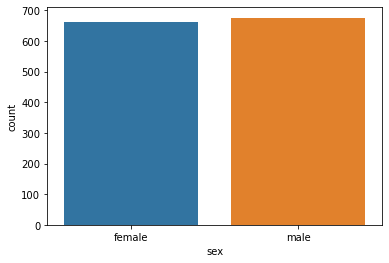

In [40]:
sns.countplot(ins_data['sex'])

In [41]:
ins_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

/home/shiva/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

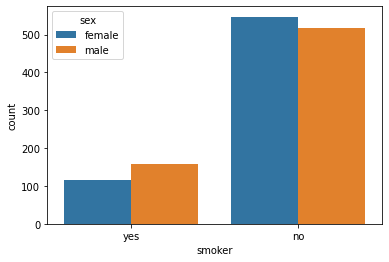

In [48]:
sns.countplot(ins_data['smoker'], hue=ins_data['sex'])

In [49]:
ins_data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='expenses'>

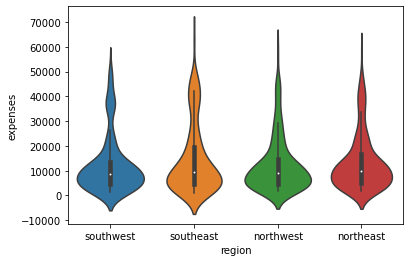

In [53]:
sns.violinplot(x = ins_data['region'], y = ins_data['expenses'], data=ins_data)

<AxesSubplot:xlabel='smoker', ylabel='expenses'>

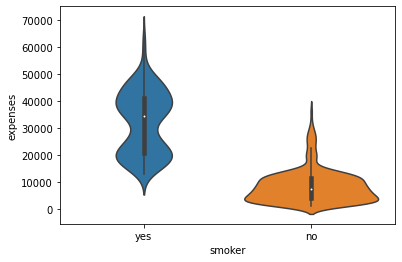

In [58]:
sns.violinplot(x = ins_data['smoker'], y = ins_data['expenses'], data = ins_data)